In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [9]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [10]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
def calc_temps(start_date, end_date):
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

print(calc_temps("2015-08-01","2015-08-07"))

[(69.0, 78.27272727272727, 85.0)]


In [11]:
#Use the `calc_temps` function to calculate the minimum, average, and maximum temperatures for your trip 
#using the matching dates from a previous year (for example, use "2017-08-01").

def calc_temps(start_date, end_date):
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

print(calc_temps("2017-08-01","2017-08-07"))   

[(72.0, 79.25, 83.0)]


In [12]:
# Print the results from your previous query.
my_vacation = calc_temps('2017-08-01', '2017-08-07')

print(f"Min Temp: {my_vacation[0][0]}")
print(f"Avg Temp: {my_vacation[0][1]}")
print(f"Max Temp: {my_vacation[0][2]}")

Min Temp: 72.0
Avg Temp: 79.25
Max Temp: 83.0


{79.25}
{83.0}


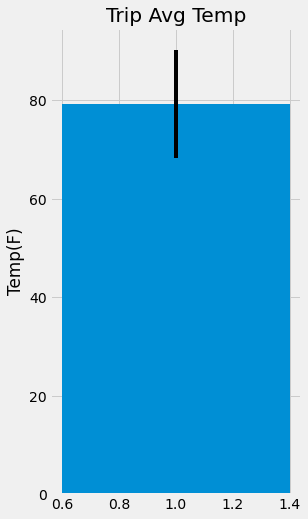

In [13]:
# Plot the results from your previous query as a bar chart.                                

# Use the average temperature for bar height (y value)
avg_temp = {my_vacation[0][1]}

# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr) 
yerr = ({my_vacation[0][2]} - {my_vacation[0][0]})
print(avg_temp)
print(yerr)

# Plot bar chart
fig, ax = plt.subplots(figsize = (4, 8))
ax.bar(1, avg_temp, yerr = 11)

# Use "Trip Avg Temp" as your Title
plt.title("Trip Avg Temp")
plt.ylabel("Temp(F)")
plt.show()                                                  


### Daily Rainfall Average

In [14]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rainfall = session.query(station.station, station.name, station.latitude, station.longitude,
                               station.elevation, func.avg(Measurement.prcp)).\
    filter(Measurement.station == station.station).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2017, 8, 1)).group_by(station.station).\
    order_by(func.avg(Measurement.prcp).desc()).all()

average_rainfall = pd.DataFrame(rainfall, columns = ['Station', 'Name', 'Latitude', 'Longitude', 
                                                              'Elevation', 'Avg. Precipitation (in.)'])

average_rainfall


,Station,Name,Latitude,Longitude,Elevation,Avg. Precipitation (in.)
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.256667
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.063333
2,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.020000
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.018947
4,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.002857


### Daily Temperature Normals

In [15]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [16]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates
trip_start = dt.date(2017,8,1)
trip_end = dt.date(2017,8,7)
trip_dates = pd.date_range(trip_start, trip_end)

# Strip off the year and save a list of strings in the format %m-%d
stripyear = trip_dates.strftime('%m-%d')

# Use the `daily_normals` function to calculate the normals for each date string 
def daily_normals(day_date):
    temps = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                          filter(func.strftime("%m-%d", Measurement.date) == day_date).all()
    return temps

# and append the results to a list called `normals`.
normals = []
for trip_date in stripyear:
    normals.append(*daily_normals(trip_date))



In [17]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
dailynormals = pd.DataFrame(normals, columns = ['Tmin','Tavg','Tmax'])

#make the trip dates the index
dailynormals['Date'] = trip_dates
dailynormals = dailynormals.set_index('Date')

dailynormals

,Tmin,Tavg,Tmax
Date,,,
2017-08-01,67.0,75.540000,83.0
2017-08-02,68.0,75.603774,84.0
2017-08-03,70.0,76.611111,85.0
2017-08-04,69.0,76.711538,84.0
2017-08-05,69.0,76.148148,82.0
2017-08-06,67.0,76.250000,83.0
2017-08-07,71.0,77.156863,83.0


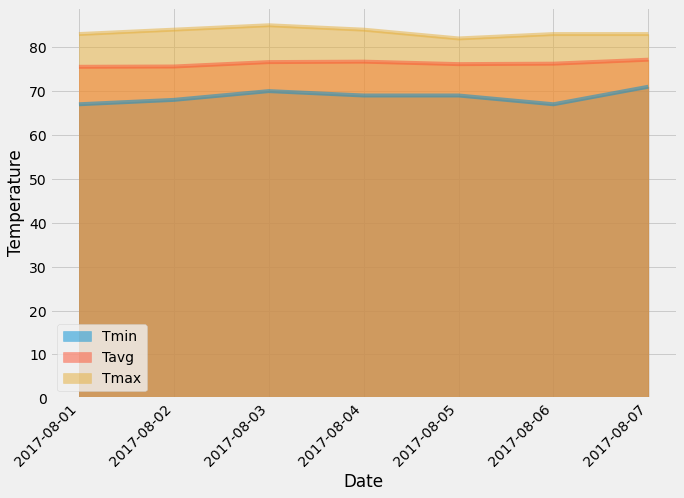

In [18]:
# Plot the daily normals as an area plot with `stacked=False`

#make an area plot for the predicted temps
dailynormals.plot(kind='area', figsize=(10, 8), stacked=False, x_compat=True,  rot=45)

#make the labels
plt.xlabel('Date')
plt.ylabel('Temperature')

plt.show()

## Close Session